Tarea: 

1) Elegir palabras claves para construir un dataset sobre cierta(s) temática(s)

2) Construir indicadores estadísticos para describir el dataset obtenido
   - Cantidad de noticias
   - Distribución en el tiempo
   - Polaridad (connotación positiva, negativa o neutra) de las noticias
   - Organizaciones y personas más mencionadas
  
3) Proponer un método para clasificar las noticias según:
   - su(s) region(es)
   - su(s) comuna(s)

4) A partir de una muestra, evaluar el porcentaje de exactitud de su método. ¿Cuáles son las limitaciones de su método?

5) Mostrar la distribución de las noticias según su comuna y región 

# 1- Temática

La temática escogida son las noticias de educación del medio "La tercera". Las palabras claves para realizar el analisis serán: *"educativa", "educar", "escolar", "escuela", "escuelas", "alumno", "alumnos", "colegio", "colegios", "universidad", "universidades", "pedagogía", "educacción", "Universidad", "universitario", "universitarios", "profesor" y "profesores"*. Estas se buscarán en las 5 primeras frases de cada noticia. 


# 2- Indicadores estadísticos
## Cantidad de noticias

In [2]:
import pandas as pd
df_2020 = pd.read_csv('./Datos/dataset_2020_latercera.csv')
df_2021 = pd.read_csv('./Datos/dataset_2021_latercera_corregido.csv')
df_2022 = pd.read_csv('./Datos/dataset_2022_latercera.csv')
df_2023 = pd.read_csv('./Datos/dataset_chile_latercera_2023.csv')


# Unir los DataFrames en uno solo
df_total = pd.concat([df_2020, df_2021, df_2022, df_2023])

# Convertir la columna 'date' al tipo datetime
df_total['date'] = pd.to_datetime(df_total['date'], format='%b %d, %Y @ %H:%M:%S.%f')

# Formatear la columna 'date' al formato YYYY-MM-DD
df_total['date'] = df_total['date'].dt.strftime('%Y-%m-%d')


print(df_2020.shape[0])
print(df_2021.shape[0])
print(df_2022.shape[0])
print(df_2023.shape[0])
print(df_total.shape[0])

28236
18539
24926
26989
98690


**El total de noticias indexadas en el medio de "la tercera" son 98690.**

In [3]:
palabras_clave = ["educativa", "educar", "escolar", "escuela", "escuelas", "alumno", "alumnos", "colegio", "colegios", "universidad", "universidades", "pedagogía", "educacción", "Universidad", "universitario", "universitarios", "profesor", "profesores"]

# Función para calcular la relevancia de una fila basada en las palabras clave
def calcular_relevancia(texto):
    frases = texto.split('.')[:5]
    text=""
    for frase in frases:
        text=text+frase+"."
    relevancia = sum(1 for palabra in palabras_clave if palabra in text)
    return relevancia

# Aplicar la función calcular_relevancia a cada fila y guardar el resultado en una nueva columna "relevancia"
df_total["relevancia"] = df_total["text"].apply(calcular_relevancia)
df_filtr = df_total[df_total["relevancia"] > 0].copy()

# Luego, ordena el DataFrame filtrado por la columna "relevancia"
df_ordenado = df_filtr.sort_values(by="relevancia", ascending=False)
df_ordenado

,date,country,media_outlet,title,text,url,relevancia
17309,2020-08-20,chile,latercera,Más de 40 colegios en Alemania registran casos...,Al menos 41 colegios en Alemania han registran...,https://www.latercera.com/mundo/noticia/mas-de...,10
1020,2023-01-15,chile,latercera,Tiemblan las tareas y ensayos: universidades p...,"Con el paso de los años, las técnicas para cop...",https://www.latercera.com/tendencias/noticia/t...,9
14360,2021-03-18,chile,latercera,EE.UU. disminuye distancia mínima entre estudi...,El Gobierno estadounidense actualizó el vierne...,https://www.latercera.com/que-pasa/noticia/eeu...,9
22091,2023-10-29,chile,latercera,Presidente del Colegio de Profesores de Atacam...,La delicada situación educativa que está vivie...,https://www.latercera.com/nacional/noticia/pre...,9
2084,2020-01-24,chile,latercera,Estudiantes realizarán encuentro para proponer...,"A horas de que se rinda la segunda PSU, que al...",https://www.latercera.com/nacional/noticia/est...,9
...,...,...,...,...,...,...,...
10351,2021-11-10,chile,latercera,Rumbo a un tercer mandato: Partido Comunista C...,El Partido Comunista Chino (PCCh) ha concluido...,https://www.latercera.com/mundo/noticia/rumbo-...,1
10231,2021-01-10,chile,latercera,Astrónomos captan desde Chile y por primera ve...,Aunque las galaxias comienzan a “morir” cuando...,https://www.latercera.com/que-pasa/noticia/ast...,1
10227,2021-01-27,chile,latercera,¿Es buena idea tomarse vacaciones en casa?,Cuando ocurren periodos prolongados de confina...,https://www.latercera.com/que-pasa/noticia/es-...,1
10221,2021-01-31,chile,latercera,Estudio afirma que coronavirus puede dejar est...,Dado que el nuevo coronavirus solo ha existido...,https://www.latercera.com/que-pasa/noticia/est...,1


**Las noticias resultantes del filtrado son 7254 de un total de 98690, lo que corresponde a un 7.35% de las noticias totales**

## Distribución en el tiempo

### Distribución en el tiempos(Total Noticias):

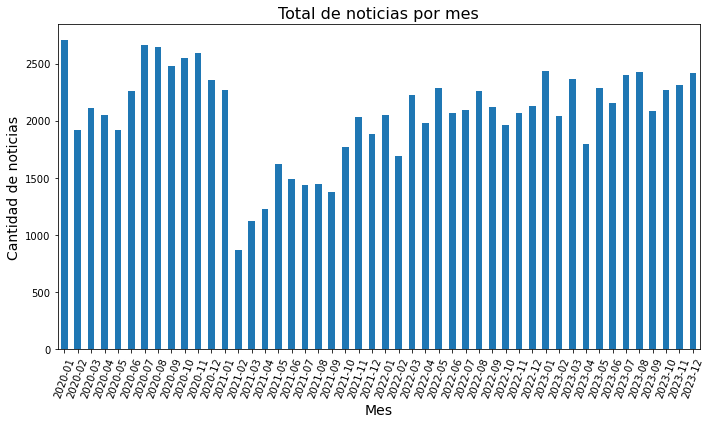

In [4]:
import matplotlib.pyplot as plt
df_total['date'] = pd.to_datetime(df_total['date'])

# Crear una nueva columna para el mes y el año
df_total['month_year'] = df_total['date'].dt.to_period('M')

# Contar la cantidad de datos por mes
month_counts = df_total['month_year'].value_counts().sort_index()
#Crear el histograma
plt.figure(figsize=(10, 6))
month_counts.plot(kind='bar')
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Cantidad de noticias', fontsize=14)
plt.title('Total de noticias por mes', fontsize=16)
plt.xticks(rotation=70, fontsize=10)  # Ajustar el tamaño de las etiquetas del eje x
plt.tight_layout()  # Ajustar el layout para que las etiquetas no se corten
plt.show()

In [5]:
month_counts

month_year
2020-01    2708
2020-02    1916
2020-03    2110
2020-04    2049
2020-05    1918
2020-06    2256
2020-07    2661
2020-08    2647
2020-09    2478
2020-10    2548
2020-11    2591
2020-12    2354
2021-01    2268
2021-02     870
2021-03    1123
2021-04    1230
2021-05    1617
2021-06    1487
2021-07    1437
2021-08    1444
2021-09    1379
2021-10    1768
2021-11    2030
2021-12    1886
2022-01    2047
2022-02    1690
2022-03    2225
2022-04    1978
2022-05    2287
2022-06    2070
2022-07    2096
2022-08    2257
2022-09    2122
2022-10    1959
2022-11    2065
2022-12    2130
2023-01    2438
2023-02    2040
2023-03    2365
2023-04    1793
2023-05    2284
2023-06    2153
2023-07    2397
2023-08    2430
2023-09    2088
2023-10    2273
2023-11    2310
2023-12    2418
Freq: M, Name: count, dtype: int64

In [6]:
month_counts.describe()

count      48.000000
mean     2056.041667
std       413.139303
min       870.000000
25%      1908.500000
50%      2103.000000
75%      2321.000000
max      2708.000000
Name: count, dtype: float64

### Distribución tiempo (Noticias Educación)

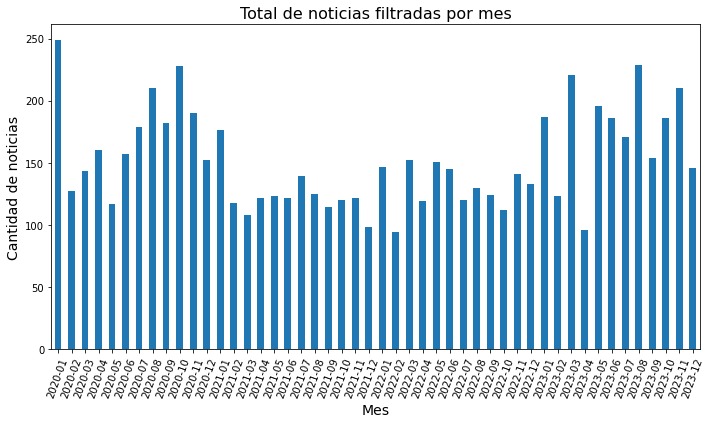

In [7]:
df_filtr['date'] = pd.to_datetime(df_filtr['date'])

# Crear una nueva columna para el mes y el año
df_filtr['month_year'] = df_filtr['date'].dt.to_period('M')

# Contar la cantidad de datos por mes
month_counts = df_filtr['month_year'].value_counts().sort_index()

#Crear el histograma
plt.figure(figsize=(10, 6))
month_counts.plot(kind='bar')
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Cantidad de noticias', fontsize=14)
plt.title('Total de noticias filtradas por mes', fontsize=16)
plt.xticks(rotation=70, fontsize=10)  # Ajustar el tamaño de las etiquetas del eje x
plt.tight_layout()  # Ajustar el layout para que las etiquetas no se corten
plt.show()

In [8]:
month_counts.describe()

count     48.00000
mean     151.12500
std       38.56557
min       94.00000
25%      122.00000
50%      144.00000
75%      179.75000
max      249.00000
Name: count, dtype: float64

## POLARIDAD

In [9]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import pipeline
from tqdm import tqdm

model_name = "finiteautomata/beto-sentiment-analysis"
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

sentiment_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

C:\Users\gluar\anaconda3\lib\site-packages\torch\_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [10]:
for index, row in tqdm(df_filtr.iterrows(), desc='Análisis de sentimiento', total=df_filtr.shape[0]):
    
    sentiment_value = sentiment_pipeline(row['title'])
    
    # Insertamos en dataframe
    df_filtr.at[index, "prediction"] = sentiment_value[0].get('label')
    df_filtr.at[index, "score"] = sentiment_value[0].get('score')

Análisis de sentimiento: 100%|█████████████████████████████████████████████████████| 7254/7254 [07:57<00:00, 15.18it/s]


In [11]:
df_filtr['prediction'].value_counts()

prediction
NEU    4087
NEG    2590
POS     577
Name: count, dtype: int64

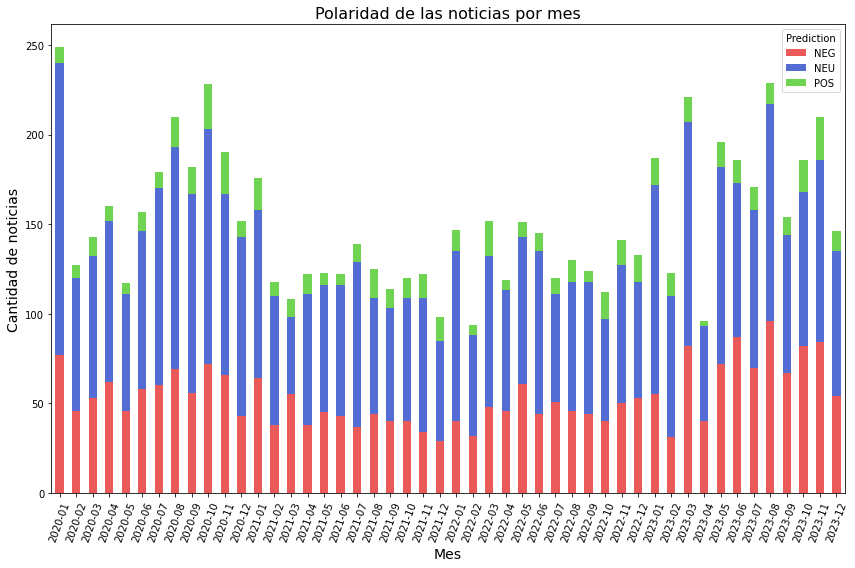

In [12]:
# Agrupar los datos por mes y valor de 'prediction' y contar las ocurrencias
grouped = df_filtr.groupby(['month_year', 'prediction']).size().unstack(fill_value=0)

# Crear el histograma
plt.figure(figsize=(12, 8))

# Crear el gráfico de barras apiladas
grouped.plot(kind='bar', stacked=True, ax=plt.gca(), color={'POS': '#70D453', 'NEG': '#EB5A5A', 'NEU': '#536DD4'})



plt.xlabel('Mes', fontsize=14)
plt.ylabel('Cantidad de noticias', fontsize=14)
plt.title('Polaridad de las noticias por mes', fontsize=16)
plt.xticks(rotation=70, fontsize=10)  # Ajustar el tamaño de las etiquetas del eje x
plt.legend(title='Prediction')
plt.tight_layout()  # Ajustar el layout para que las etiquetas no se corten

plt.show()


In [13]:
df_filtr['prediction'].value_counts()

prediction
NEU    4087
NEG    2590
POS     577
Name: count, dtype: int64

In [14]:
df_filtr['year'] = df_filtr['date'].dt.to_period('Y')
grouped_year = df_filtr.groupby(['year', 'prediction']).size().unstack(fill_value=0)
grouped_year

prediction,NEG,NEU,POS
year,,,
2020,708,1236,150
2021,507,846,134
2022,555,880,133
2023,820,1125,160


In [15]:
grouped['%NEG'] = grouped['NEG']/(grouped['NEG']+grouped['NEU']+grouped['POS']) * 100
grouped['%POS'] = grouped['POS']/(grouped['NEG']+grouped['NEU']+grouped['POS']) * 100
grouped['%NEU'] = grouped['NEU']/(grouped['NEG']+grouped['NEU']+grouped['POS']) * 100

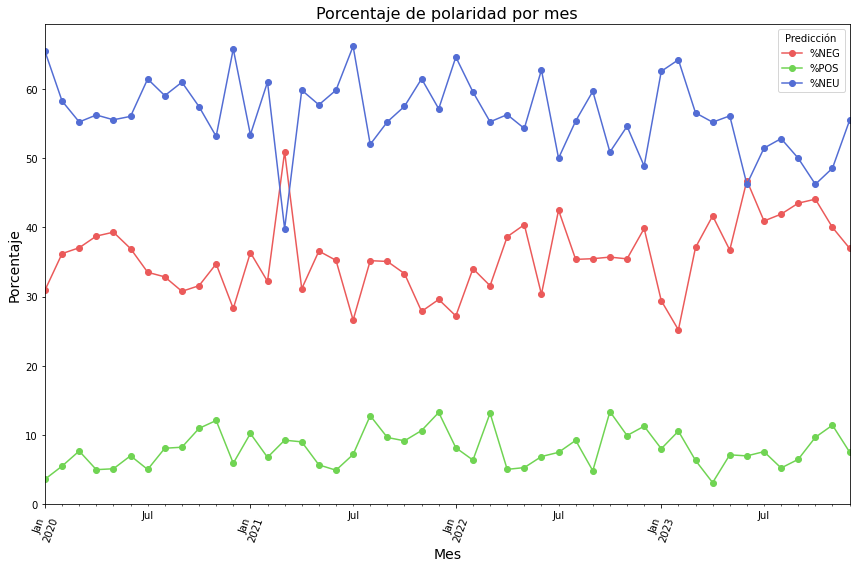

In [16]:
plt.figure(figsize=(12, 8))

grouped['%NEG'].plot(kind='line', marker='o', linestyle='-', color='#EB5A5A', label='%NEG')
grouped['%POS'].plot(kind='line', marker='o', linestyle='-', color='#70D453', label='%POS')
grouped['%NEU'].plot(kind='line', marker='o', linestyle='-', color='#536DD4', label='%NEU')


plt.xlabel('Mes', fontsize=14)
plt.ylabel('Porcentaje', fontsize=14)
plt.title('Porcentaje de polaridad por mes', fontsize=16)
plt.xticks(rotation=70, fontsize=10)  # Ajustar el tamaño de las etiquetas del eje x
plt.legend(title='Predicción')
plt.tight_layout()  # Ajustar el layout para que las etiquetas no se corten

plt.show()

In [17]:
grouped['year'] = grouped.index.year
grouped[grouped['year'] == 2020].describe()

prediction,NEG,NEU,POS,%NEG,%POS,%NEU,year
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.0
mean,59.000000,103.000000,12.500000,34.247267,7.025776,58.726957,2020.0
std,10.837645,27.313001,6.230424,3.483933,2.544700,4.002345,0.0
min,43.000000,65.000000,6.000000,28.289474,3.614458,53.157895,2020.0
25%,51.250000,85.750000,8.750000,31.415134,5.103137,55.927105,2020.0
50%,59.000000,100.500000,10.000000,34.128198,6.463711,57.861928,2020.0
75%,66.750000,114.250000,15.500000,36.972741,8.131868,61.104887,2020.0
max,77.000000,163.000000,25.000000,39.316239,12.105263,65.789474,2020.0


In [18]:
grouped[grouped['year'] == 2021].describe()

prediction,NEG,NEU,POS,%NEG,%POS,%NEU,year
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.0
mean,42.250000,70.500000,11.166667,34.181017,9.051896,56.767087,2021.0
std,9.362643,13.833425,3.485902,6.222066,2.579059,6.557705,0.0
min,29.000000,43.000000,6.000000,26.618705,4.918033,39.814815,2021.0
25%,37.750000,64.500000,9.500000,30.758615,7.090599,54.799641,2021.0
50%,40.000000,71.500000,11.000000,34.210526,9.212963,57.611789,2021.0
75%,44.250000,73.500000,13.000000,35.525335,10.334389,60.131286,2021.0
max,64.000000,94.000000,18.000000,50.925926,13.265306,66.187050,2021.0


In [19]:
grouped[grouped['year'] == 2022].describe()

prediction,NEG,NEU,POS,%NEG,%POS,%NEU,year
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.0
mean,46.250000,73.333333,11.083333,35.551951,8.425861,56.022188,2022.0
std,7.350015,12.935739,4.399552,4.417660,3.009777,4.909055,0.0
min,32.000000,56.000000,6.000000,27.210884,4.838710,48.872180,2022.0
25%,43.000000,63.750000,7.500000,33.426652,6.111737,53.451691,2022.0
50%,46.000000,73.000000,11.000000,35.472432,7.831633,55.323887,2022.0
75%,50.250000,82.500000,14.250000,38.954003,10.266357,59.600206,2022.0
max,61.000000,95.000000,20.000000,42.500000,13.392857,64.625850,2022.0


In [20]:
grouped[grouped['year'] == 2023].describe()

prediction,NEG,NEU,POS,%NEG,%POS,%NEU,year
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.0
mean,68.333333,93.750000,13.333333,38.694211,7.513225,53.792564,2023.0
std,19.841799,21.460852,4.905161,6.186130,2.274006,5.768205,0.0
min,31.000000,53.000000,3.000000,25.203252,3.125000,46.236559,2023.0
25%,54.750000,80.500000,11.750000,36.923399,6.453840,49.642857,2023.0
50%,71.000000,87.000000,13.000000,40.467836,7.338552,54.023381,2023.0
75%,82.500000,111.750000,14.250000,42.317671,8.435398,56.232108,2023.0
max,96.000000,125.000000,24.000000,46.774194,11.428571,64.227642,2023.0


### Análisis de tópico sobre las noticias negaticas durante y después de la pandemia

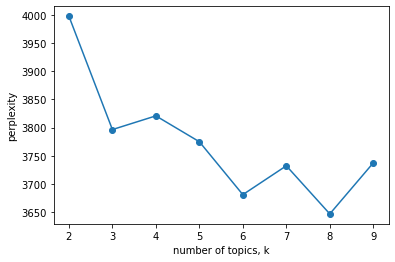

In [29]:
from sklearn.decomposition import LatentDirichletAllocation

num_k = range(2, 10)

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()
    

tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                stop_words=myStopWords,tokenizer=spacy_tokenizer, ngram_range=(1,1))
tf = tf_vectorizer.fit_transform(df_filtr[(df_filtr['year'] == '2020') | (df_filtr['year'] == '2021')].text)
diccionario= tf_vectorizer.get_feature_names_out()


perp = []
for k in num_k:
    #Estimación de LDA con Bayes Variacional
    lda = LatentDirichletAllocation(n_components=k, max_iter=10,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

    lda.fit(tf)
    #Cálculo de índice de ajuste de los datos
    perp.append(lda.perplexity(tf))

plt.plot(num_k, perp, '-o')
plt.xlabel('number of topics, k')
plt.ylabel('perplexity')
plt.xticks(num_k)
plt.show()

[[1.46025958e-01 7.28463299e-01 1.35371346e-03 1.34891411e-03
  1.21451284e-01 1.35683177e-03]
 [3.52351414e-01 6.39369049e-01 4.78462849e-04 6.83911423e-03
  4.81338554e-04 4.80621684e-04]
 [7.51131788e-04 7.47703620e-04 1.80331180e-01 7.47581347e-04
  7.49615151e-04 8.16672788e-01]
 ...
 [3.71130182e-04 4.68185497e-03 3.94743229e-02 3.69415105e-04
  3.50603630e-02 9.20042914e-01]
 [1.35401591e-01 5.22268518e-04 8.62506222e-01 5.23167624e-04
  5.23398574e-04 5.23352164e-04]
 [2.55050350e-01 9.41983339e-04 7.41172900e-01 9.44872304e-04
  9.45191022e-04 9.44703010e-04]]
[0.22538892 0.05722104 0.20423901 0.03549105 0.28609609 0.1915639 ]
[0 1 2 3 4 5]


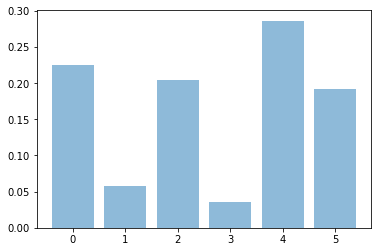

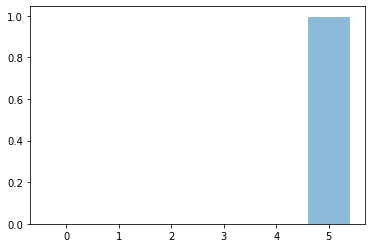

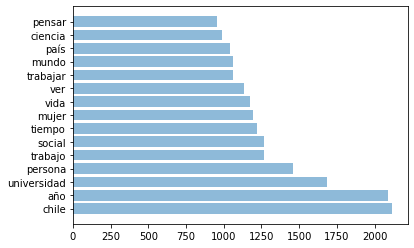

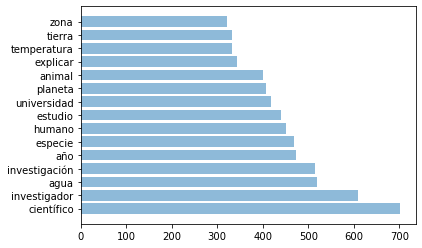

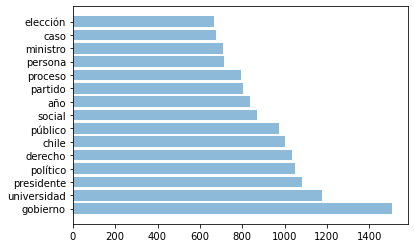

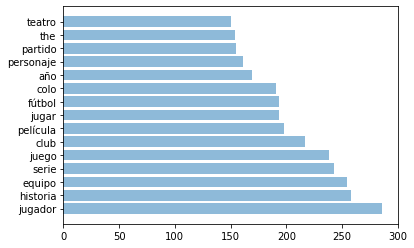

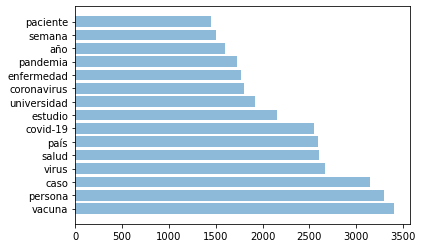

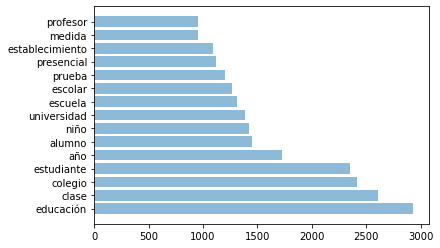

In [32]:
from matplotlib.pylab import hist, show
import seaborn as sns
import numpy as np

true_k = 6

lda = LatentDirichletAllocation(n_components=true_k, max_iter=1000,
                                learning_method='online',
                                learning_offset=10.,
                                random_state=0)
y=lda.fit_transform(tf)

print(y)
#distribución de tópicos en todos los documentos
dist = sum(y)/len(df_filtr[(df_filtr['year'] == '2020') | (df_filtr['year'] == '2021')].text)
print(dist)

w=np.arange(0,true_k)
print(w)
plt.bar(w,height=dist,alpha=0.5,tick_label=w)
show()
#distribución de tópicos en el documento 51
plt.bar(w,height=y[50],alpha=0.5,tick_label=w)
show()


#frecuencia de palabras por tópico
n_top_words=15
numo =np.arange(0,n_top_words)
for idx,topic in enumerate(lda.components_):
    d =[]
    s = []
    for i in topic.argsort()[:-n_top_words - 1:-1]:
        s.append(diccionario[i])
        d.append(topic[i])
    
    plt.barh(numo,width=d,alpha=0.5,tick_label=s)
    show()


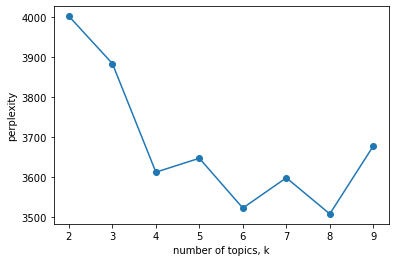

In [33]:
num_k = range(2, 10)

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()
    

tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                stop_words=myStopWords,tokenizer=spacy_tokenizer, ngram_range=(1,1))
tf = tf_vectorizer.fit_transform(df_filtr[(df_filtr['year'] == '2022') | (df_filtr['year'] == '2023')].text)
diccionario= tf_vectorizer.get_feature_names_out()


perp = []
for k in num_k:
    #Estimación de LDA con Bayes Variacional
    lda = LatentDirichletAllocation(n_components=k, max_iter=10,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

    lda.fit(tf)
    #Cálculo de índice de ajuste de los datos
    perp.append(lda.perplexity(tf))

plt.plot(num_k, perp, '-o')
plt.xlabel('number of topics, k')
plt.ylabel('perplexity')
plt.xticks(num_k)
plt.show()

[[1.79766044e-01 4.76570597e-04 4.76118911e-04 4.75639442e-04
  1.27696133e-02 8.06036014e-01]
 [4.70274523e-04 4.70730231e-04 4.23166554e-02 4.71093722e-04
  9.55801037e-01 4.70208915e-04]
 [3.75545799e-04 1.17085779e-01 1.35033383e-01 5.34720514e-02
  6.93658134e-01 3.75107401e-04]
 ...
 [2.19847820e-03 2.20276588e-03 7.36025841e-02 9.17591214e-01
  2.20555948e-03 2.19939819e-03]
 [7.36110834e-04 7.38654709e-04 8.97106112e-02 9.07332195e-01
  7.39435320e-04 7.42992830e-04]
 [4.68649316e-01 2.35666094e-01 8.40364016e-02 4.48199279e-02
  1.65904168e-01 9.24092747e-04]]
[0.06137569 0.22416381 0.1728429  0.21266706 0.28758886 0.04136168]
[0 1 2 3 4 5]


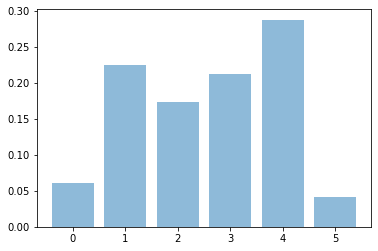

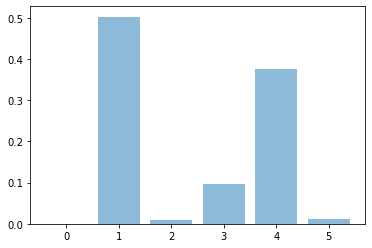

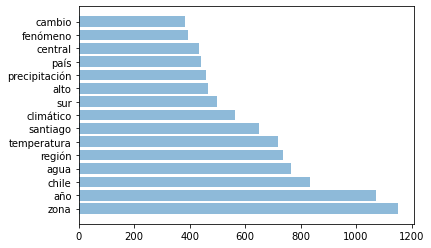

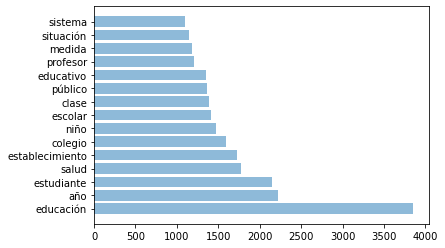

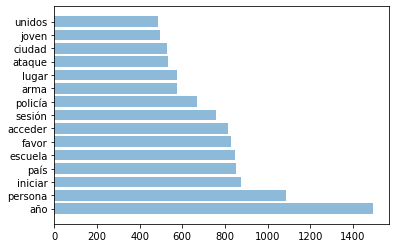

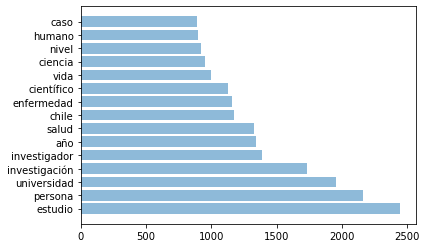

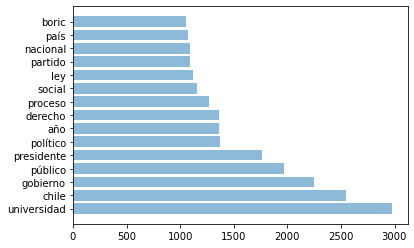

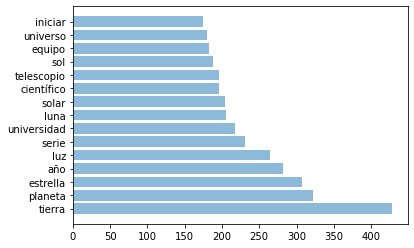

In [34]:
true_k = 6

lda = LatentDirichletAllocation(n_components=true_k, max_iter=1000,
                                learning_method='online',
                                learning_offset=10.,
                                random_state=0)
y=lda.fit_transform(tf)

print(y)
#distribución de tópicos en todos los documentos
dist = sum(y)/len(df_filtr[(df_filtr['year'] == '2022') | (df_filtr['year'] == '2023')].text)
print(dist)

w=np.arange(0,true_k)
print(w)
plt.bar(w,height=dist,alpha=0.5,tick_label=w)
show()
#distribución de tópicos en el documento 51
plt.bar(w,height=y[50],alpha=0.5,tick_label=w)
show()


#frecuencia de palabras por tópico
n_top_words=15
numo =np.arange(0,n_top_words)
for idx,topic in enumerate(lda.components_):
    d =[]
    s = []
    for i in topic.argsort()[:-n_top_words - 1:-1]:
        s.append(diccionario[i])
        d.append(topic[i])
    
    plt.barh(numo,width=d,alpha=0.5,tick_label=s)
    show()

### Organizaciones y personas más mencionadas

In [399]:
import spacy

# Cargar el modelo de Spacy para el idioma que necesites (por ejemplo, español)
nlp = spacy.load("es_core_news_sm")

# Función para extraer entidades de tipo persona de un texto usando Spacy
def extract_person_entities(text):
    doc = nlp(text)
    return [ent.text for ent in doc.ents if ent.label_ == "PER" and len(ent.text.split()) >= 2]

def extract_org_entities(text):
    doc = nlp(text)
    return [ent.text for ent in doc.ents if ent.label_ == "ORG" and len(ent.text.split()) >= 2]

# Aplicar la función a cada fila de la columna "text" y guardar los resultados en una nueva columna
df_filtr["person_entities"] = df_filtr["text"].apply(extract_person_entities)
df_filtr["org_entities"] = df_filtr["text"].apply(extract_org_entities)

In [400]:
# Convertir la lista de personas en una sola lista para contar las ocurrencias de cada persona
all_persons = [person for sublist in df_filtr["person_entities"] for person in sublist]
# Contar las ocurrencias de cada persona
person_counts = pd.Series(all_persons).value_counts()
# Mostrar las personas más mencionadas
person_counts.head(20)

Gabriel Boric                  627
Marco Antonio Ávila            280
Sebastián Piñera               234
Raúl Figueroa                  232
Michelle Bachelet              173
Donald Trump                   151
Qué Pasa                       139
Joe Biden                      127
Camila Vallejo                 118
Carlos Díaz                    104
Enrique Paris                  102
Ignacio Sánchez                100
Ennio Vivaldi                   98
José Antonio Kast               89
Presidente Sebastián Piñera     89
Raúl Cordero                    85
Presidente Boric                79
Pedro Castillo                  79
Izkia Siches                    78
Daniel Jadue                    77
Name: count, dtype: int64

In [401]:
# Convertir la lista de personas en una sola lista para contar las ocurrencias de cada persona
all_orgs = [org for sublist in df_filtr["org_entities"] for org in sublist]
# Contar las ocurrencias de cada persona
orgs_counts = pd.Series(all_orgs).value_counts()
# Mostrar las personas más mencionadas
orgs_counts.head(20)

Universidad de Chile                        1665
Universidad Católica                         506
Colegio de Profesores                        387
Región Metropolitana                         357
Convención Constitucional                    238
Frente Amplio                                221
Organización Mundial de la Salud             214
Universidad de Oxford                        182
Universidad de Concepción                    172
Partido Republicano                          161
Universidad de Valparaíso                    143
Universidad Johns Hopkins                    141
La Tercera PM                                138
Universidad de Harvard                       132
Instituto Nacional                           131
Partido Comunista                            126
Instituto de Salud Pública                   116
Pontificia Universidad Católica de Chile     115
Unión Europea                                112
Consejo de Rectores                          103
Name: count, dtype: 

# 3- Método para clasificar las noticias

## Según su comuna

In [178]:
!pip install -q -U google-generativeai

In [297]:
GOOGLE_API_KEY = "YOUR_API_KEY"

# Importamos el paquete recien instalado
import google.generativeai as genai
import json
import time

genai.configure(api_key = GOOGLE_API_KEY)
model = genai.GenerativeModel('gemini-pro')

def obtener_comuna(text):
    time.sleep(2)
    question = '''A partir de este texto, dame una respuesta en formato json
{"Comuna": Comuna del evento principal}
No incluyas nada más de texto en la respuesta (Tampoco "la comuna es" o el país). 
Si no se incluye en el texto, entonces dame la comuna de la institución principal que se nombra o en caso extremo, la comuna o ciudad más probable según la información.
NUNCA dejes la respuesta como null
Texto: ''' + text + ". \n Repito, NUNCA DEJES LA RESPUESTA COMO NULL"
    try:
        return json.loads(model.generate_content(question).text)["Comuna"]
    except Exception as e:  # Catch more general exceptions
        print(f"Unexpected error: {e}")
        if(str(e) == '429 Resource has been exhausted (e.g. check quota).'):
            return "NO QUOTA"
        return "NO"

In [298]:
df_filtr['Comuna'] = df_filtr['text'].apply(obtener_comuna)

In [300]:
df_filtr.loc[df_filtr['Comuna'] == 'NO', 'Comuna'] = df_filtr.loc[df_filtr['Comuna'] == 'NO', 'text'].apply(obtener_comuna)

Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: 'Comuna'
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected er

Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: 'NoneType' object is not subscriptable
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: 'NoneType' object is not subscriptable
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: 'NoneType' object is not subscriptable
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 column 

Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 

Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: 'NoneType' object is not subscriptable
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: 'NoneType' object is not subscriptable
Unexpected error: 'NoneType' object is not subscriptable
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: 'NoneType' object is not subscr

Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: 'NoneType' object is not subscriptable
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: 'NoneType' object is not subscriptable
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: 'NoneType' object is not subscriptable
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: 'Comuna'
Unexpected error: 'Comuna'
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 column 1 (cha

Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: 'NoneType' object is not subscriptable
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 c

Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 42

Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 42

Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 42

Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 42

Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 42

Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 42

Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 42

Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 42

Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 42

Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 42

Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 42

Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 42

Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 42

Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 42

Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 42

Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 42

Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 42

Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 42

Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 42

Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 42

Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 42

Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 42

In [337]:
df_filtr.loc[df_filtr['Comuna'] == 'NO QUOTA', 'Comuna'] = df_filtr.loc[df_filtr['Comuna'] == 'NO QUOTA', 'text'].apply(obtener_comuna)

Unexpected error: 'NoneType' object is not subscriptable
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: 'Comuna'
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: Expecting value: line 1 column 1 (char 0)
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 'NoneType' object is not subscriptable
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 4

Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 42

Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 42

Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 42

Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 429 Resource has been exhausted (e.g. check quota).
Unexpected error: 42

## Según su región

In [438]:
import json

with open('cities.json', 'r', encoding='utf-8') as file:
    regiones = json.load(file)

def encontrar_region_por_comuna(text):
    for region in regiones:
        for comuna in region['communes']:
            if comuna['name'].lower() == text.lower():
                return region['name']
    return "NO"

In [439]:
df_filtr['Region'] = df_filtr['Comuna'].apply(encontrar_region_por_comuna)
df_filtr['Region']

0                              NO
1                              NO
2       Metropolitana de Santiago
3                              NO
4       Metropolitana de Santiago
                  ...            
7249                           NO
7250    Metropolitana de Santiago
7251    Metropolitana de Santiago
7252                     Los Ríos
7253    Metropolitana de Santiago
Name: Region, Length: 7254, dtype: object

In [440]:
len(df_filtr[df_filtr['Region'] != 'NO'])

3038

In [442]:
df_filtr.to_csv("datos_filtrados.csv")

In [444]:
df_filtr = pd.read_csv('./datos_filtrados.csv')
df_filtr

,Unnamed: 0,date,country,media_outlet,title,text,url,relevancia,month_year,prediction,score,person_entities,org_entities,Comuna,Region
0,0,2020-01-01,chile,latercera,Descubren gigantesco cráter por el impacto de ...,"Un campo de manchas negras vidriosas, esparcid...",https://www.latercera.com/que-pasa/noticia/des...,1,2020-01,NEU,0.991257,[],['Universidad Tecnológica de Nanjing'],NO,NO
1,1,2020-01-01,chile,latercera,Así era el pez que hace 375 millones de años c...,Una investigación sobre peces fosilizados del ...,https://www.latercera.com/que-pasa/noticia/asi...,1,2020-01,NEG,0.796142,"['Thomas Stewart', 'Neil Shubin', 'Ihna Yoo', ...",[],Chicago,NO
2,2,2020-01-01,chile,latercera,Llamados a protestas marcan la antesala de la ...,A horas de que se rinda la Prueba de Selección...,https://www.latercera.com/nacional/noticia/lla...,1,2020-01,NEG,0.992838,"['Aldo Valle', 'Ignacio Sánchez', 'admisión di...",['Asamblea Coordinadora de Estudiantes Secunda...,Santiago,Metropolitana de Santiago
3,3,2020-01-01,chile,latercera,Desde el Cruch descartan nuevo aplazamiento de...,"Esta mañana, Aldo Valle, rector de la Universi...",https://www.latercera.com/nacional/noticia/des...,1,2020-01,NEU,0.994395,"['Aldo Valle', 'https://www.latercera.com/naci...","['Universidad de Valparaíso', 'Consejo de Rect...",NO,NO
4,4,2020-01-01,chile,latercera,La nueva sociedad de médicos chilenos formados...,"""Soy médico general, chileno, y actualmente tr...",https://www.latercera.com/nacional/noticia/la-...,1,2020-01,NEG,0.996074,"['Rolando Santos', 'Izkia Siches', 'Rolando Sa...","['Servicio de Atención Primaria de Urgencia', ...",Pudahuel,Metropolitana de Santiago
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7249,7249,2021-01-27,chile,latercera,Memorias de una pesadilla: cuando la U ya tuvo...,Coquimbo Unido vence a Unión Española y da un ...,https://www.latercera.com/la-tercera-pm/notici...,1,2021-01,NEG,0.998829,"['Unión Española', 'Rafael Dudamel', 'Soinca B...","['Universidad de Chile', 'partido de definició...",no se especifica,NO
7250,7250,2021-01-27,chile,latercera,Demandan a U. de Chile por $ 8.429 millones po...,Luego de que 29 de agosto de 2019 una profesor...,https://www.latercera.com/la-tercera-pm/notici...,2,2021-01,NEG,0.802090,"['daño moral y emergente', 'Manuel de Salas', ...","['Universidad de Chile', '26 Juzgado Civil de'...",Santiago,Metropolitana de Santiago
7251,7251,2021-12-28,chile,latercera,Balance del Mineduc: 162 colegios del país cer...,"Salvo contadas excepciones, el año escolar lle...",https://www.latercera.com/la-tercera-pm/notici...,5,2021-12,NEG,0.998475,"['Raúl Figueroa', 'Alejandra Grebe', 'Javiera ...","['Superintendencia de Educación', 'Región Metr...",Lo Espejo,Metropolitana de Santiago
7252,7252,2021-12-27,chile,latercera,Boric ordena “La Moneda chica” y se devela ase...,Son quienes estarán con el presidente electo G...,https://www.latercera.com/la-tercera-pm/notici...,1,2021-12,NEU,0.997870,"['Gabriel Boric', 'Michelle Bachelet', 'Pedro ...","['jefa de gabinete', 'CS Antonia Orellana']",Valdivia,Los Ríos


In [607]:
df_filtr['year'] = df_filtr['date'].dt.to_period('Y')
grouped_year = df_filtr[df_filtr['Region'] != 'NO'].groupby(['year', 'prediction']).size().unstack(fill_value=0)
grouped_year

prediction,NEG,NEU,POS
year,,,
2020,268,516,55
2021,186,333,61
2022,250,431,58
2023,359,465,56


# 4- Porcentaje de exactitud del método

## ¿Cuáles son las limitaciones de su método?

# Distribución de las noticias según su comuna y región 

In [527]:
df_filtr['Comuna'] = df_filtr['Comuna'].str.lower()
conteo_region = df_filtr[df_filtr['Region'] != 'NO'].groupby('Region')['prediction'].value_counts().unstack(fill_value=0)
conteo_region.index = conteo_region.index.values
conteo_region

prediction,NEG,NEU,POS
Aisén del General Carlos Ibáñez del Campo,0,2,0
Antofagasta,20,30,6
Araucanía,50,63,8
Arica y Parinacota,5,12,0
Atacama,21,20,3
Biobío,32,64,7
Coquimbo,16,18,4
Libertador General Bernardo O’Higgins,19,16,3
Los Lagos,7,16,0
Los Ríos,11,27,10


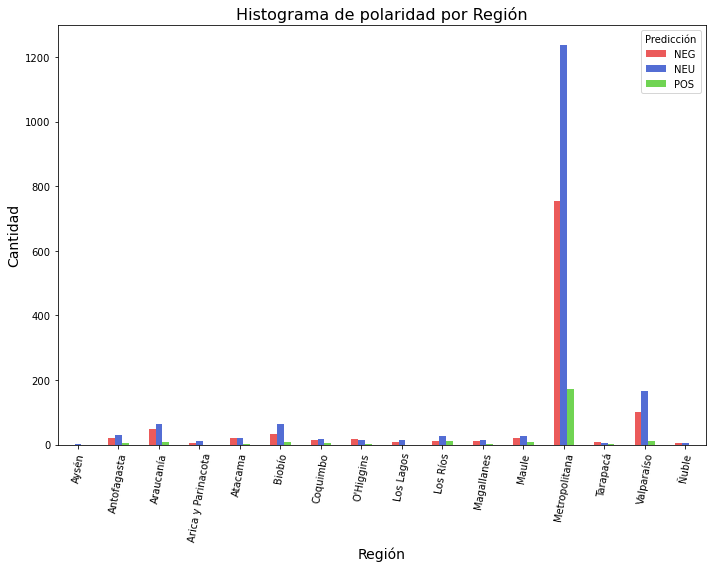

In [614]:
conteo_region.plot(kind='bar', stacked=False, figsize=(10, 8), align='center', color={'POS': '#70D453', 'NEG': '#EB5A5A', 'NEU': '#536DD4'})  # Ajustar el parámetro align
plt.title('Histograma de polaridad por Región', fontsize=16)
plt.xlabel('Región', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)

nuevos_nombres = ['Aysén', 'Antofagasta', 'Araucanía', 'Arica y Parinacota', 'Atacama', 'Biobío', 'Coquimbo',
                 "O'Higgins", 'Los Lagos', 'Los Ríos', 'Magallanes', 'Maule', 'Metropolitana', 'Tarapacá', 'Valparaíso', 'Ñuble']

plt.xticks(ticks=range(len(nuevos_nombres)), labels=nuevos_nombres, rotation=80, fontsize=10)  
plt.legend(title='Predicción')  # Mostrar leyenda con título
plt.tight_layout()  # Ajustar el diseño del gráfico

plt.show()

geopandas: https://geopandas.org/en/stable/

Kepler: https://kepler.gl/


In [445]:
import geopandas as gpd

In [446]:
SHAPEFILE=r'./shape/comunas.shp' #shapefile de las regiones y comunas de Chile
# fuente: https://www.bcn.cl/siit/mapas_vectoriales

In [447]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Cargar los datos geoespaciales de las regiones de Chile
chile_regions = gpd.read_file(SHAPEFILE, encoding='utf-8')

In [505]:
chile_regions

,objectid,shape_leng,dis_elec,cir_sena,cod_comuna,codregion,st_area_sh,st_length_,Region,Comuna,Provincia,geometry,value
0,48,170038.624165,16,8,6204,6,9.685774e+08,206184.271675,Región del Libertador Bernardo O'Higgins,marchigüe,Cardenal Caro,"POLYGON ((-7992818.789 -4056669.319, -7992731....",8
1,29,125730.104795,15,8,6102,6,4.157446e+08,151911.576827,Región del Libertador Bernardo O'Higgins,codegua,Cachapoal,"POLYGON ((-7831651.813 -4022443.109, -7831596....",4
2,30,63026.084422,15,8,6103,6,1.448565e+08,76355.326122,Región del Libertador Bernardo O'Higgins,coinco,Cachapoal,"POLYGON ((-7892616.357 -4060673.364, -7892621....",6
3,31,89840.903562,15,8,6104,6,3.256572e+08,108874.623150,Región del Libertador Bernardo O'Higgins,coltauco,Cachapoal,"POLYGON ((-7906457.717 -4051723.734, -7906266....",7
4,78,122626.493264,23,11,9121,9,6.990727e+08,156680.410681,Región de La Araucanía,cholchol,Cautín,"POLYGON ((-8121756.186 -4645860.295, -8121644....",10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,255,130240.555805,19,10,16305,16,8.751006e+08,160459.137929,Región de Ñuble,san nicolás,Punilla,"POLYGON ((-8041950.854 -4349201.562, -8041735....",9
342,253,311061.932415,19,10,16304,16,2.393007e+09,388109.613857,Región de Ñuble,san fabián,Punilla,"POLYGON ((-7931328.549 -4363544.179, -7931320....",5
343,245,159257.906431,19,10,16303,16,7.638173e+08,195593.933727,Región de Ñuble,ñiquén,Punilla,"POLYGON ((-8026032.185 -4319505.012, -8025933....",4
344,243,157467.049667,19,10,16104,16,1.044405e+09,196962.664313,Región de Ñuble,el carmen,Ñuble,"POLYGON ((-7986315.104 -4415272.935, -7986309....",8


In [536]:
df_filtr['Comuna'] = df_filtr['Comuna'].str.lower()
conteo_predictions = df_filtr[df_filtr['Region'] != 'NO'].groupby('Comuna')['prediction'].value_counts().unstack(fill_value=0)

In [537]:
chile_regions['Comuna'] = chile_regions['Comuna'].str.lower()
resultado_merge = pd.merge(chile_regions, conteo_predictions, on='Comuna', how='left')
resultado_merge = resultado_merge.dropna(subset=['NEG'])

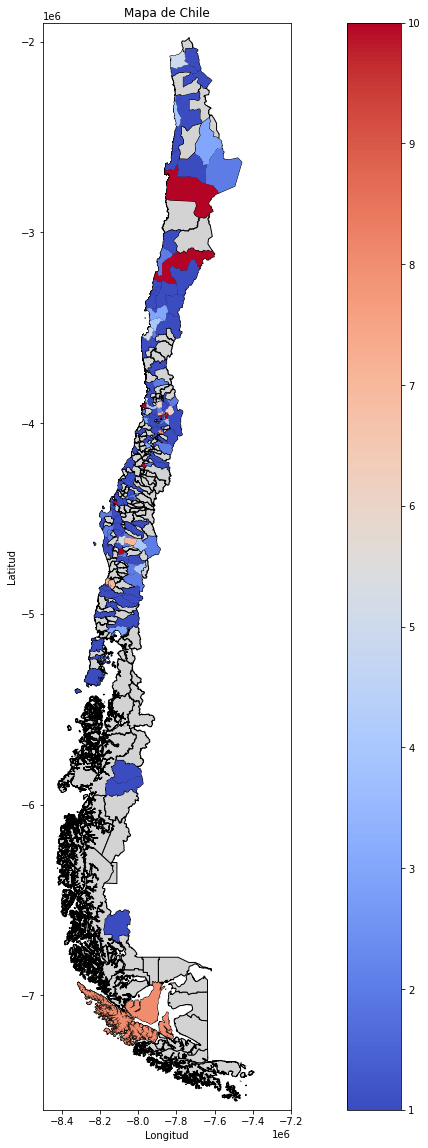

In [631]:
# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(20, 20))
# Reemplaza 'variable' con el nombre de la columna de tu DataFrame que contiene la variable a visualizar
# Reemplaza 'cmap' con el mapa de colores que desees usar
# Reemplaza 'legend' con True si deseas mostrar la leyenda
# Dibujar el mapa de Chile
chile_regions.plot(ax=ax, color='lightgrey', edgecolor='black')

# Colorear las regiones según una variable específica
# Reemplaza 'variable' con el nombre de la columna de tu DataFrame que contiene la variable a visualizar
# Reemplaza 'cmap' con el mapa de colores que desees usar
# Reemplaza 'legend' con True si deseas mostrar la leyenda
# Reemplaza 'vmin' y 'vmax' con los valores mínimo y máximo de tu variable para normalizar los colores

#chile_regions.plot(ax=ax, column='variable', cmap='coolwarm', legend=True, vmin=0, vmax=100)

resultado_merge.plot(ax=ax, column="NEG", cmap='coolwarm', legend=True, vmin=1, vmax=10)

# Añadir título y etiquetas de los ejes
plt.title('Mapa de Chile')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.ylim([-7600000, -1900000])
plt.xlim([-8500000, -7200000])

# Mostrar el mapa
plt.show()

C:\Users\gluar\AppData\Local\Temp\ipykernel_26392\3517791938.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


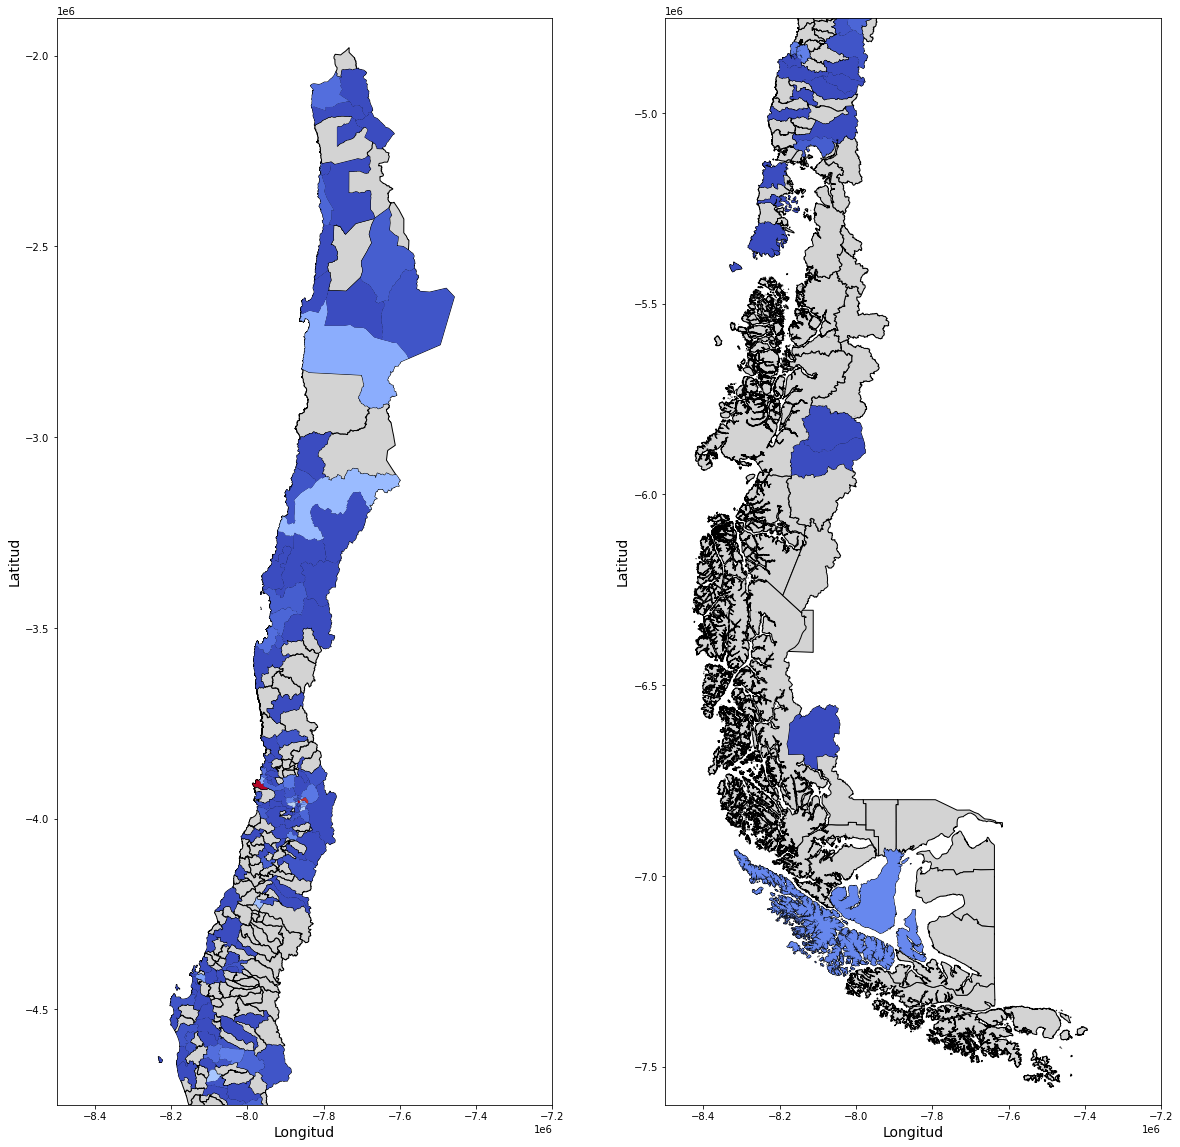

In [648]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Crear una figura y ejes con subtramas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 20))


chile_regions.plot(ax=ax1, color='lightgrey', edgecolor='black')
resultado_merge.plot(ax=ax1, column="NEG", cmap='coolwarm', legend=False, vmin=1, vmax=50)
ax1.set_xlabel('Longitud', fontsize=14)
ax1.set_ylabel('Latitud', fontsize=14)
ax1.set_ylim([-4750000, -1900000])
ax1.set_xlim([-8500000, -7200000])


chile_regions.plot(ax=ax2, color='lightgrey', edgecolor='black')
resultado_merge.plot(ax=ax2, column="NEG", cmap='coolwarm', legend=False, vmin=1, vmax=50)
ax2.set_xlabel('Longitud', fontsize=14)
ax2.set_ylabel('Latitud', fontsize=14)
ax2.set_ylim([-7600000, -4750000])
ax2.set_xlim([-8500000, -7200000])
# Mostrar el mapa

fig.show()


In [670]:
conteo_pandemia_reg = df_filtr[(df_filtr['Region'] != 'NO') & ((df_filtr['year'] == '2020') | (df_filtr['year'] == '2021'))].groupby(['Region'])['prediction'].value_counts().unstack(fill_value=0)
conteo_pandemia_reg['%NEG'] = conteo_pandemia_reg['NEG']/(conteo_pandemia_reg['NEG']+conteo_pandemia_reg['NEU']+conteo_pandemia_reg['POS']) * 100
conteo_pandemia_reg

prediction,NEG,NEU,POS,%NEG
Region,,,,
Aisén del General Carlos Ibáñez del Campo,0,2,0,0.000000
Antofagasta,11,14,3,39.285714
Araucanía,15,28,3,32.608696
Arica y Parinacota,3,8,0,27.272727
Atacama,3,3,1,42.857143
Biobío,9,19,0,32.142857
Coquimbo,6,6,4,37.500000
Libertador General Bernardo O’Higgins,5,9,1,33.333333
Los Lagos,2,6,0,25.000000


In [671]:
conteo_post_pandemia_reg = df_filtr[(df_filtr['Region'] != 'NO') & ((df_filtr['year'] == '2022') | (df_filtr['year'] == '2023'))].groupby(['Region'])['prediction'].value_counts().unstack(fill_value=0)
conteo_post_pandemia_reg['%NEG'] = conteo_post_pandemia_reg['NEG']/(conteo_post_pandemia_reg['NEG']+conteo_post_pandemia_reg['NEU']+conteo_post_pandemia_reg['POS']) * 100
conteo_post_pandemia_reg

prediction,NEG,NEU,POS,%NEG
Region,,,,
Antofagasta,9,17,2,32.142857
Araucanía,34,37,4,45.333333
Arica y Parinacota,1,5,0,16.666667
Atacama,18,17,2,48.648649
Biobío,22,47,6,29.333333
Coquimbo,6,15,1,27.272727
Libertador General Bernardo O’Higgins,15,6,2,65.217391
Los Lagos,5,10,0,33.333333
Los Ríos,7,11,8,26.923077


In [725]:
conteo_pandemia = df_filtr[(df_filtr['Region'] != 'NO') & ((df_filtr['year'] == '2020') | (df_filtr['year'] == '2021'))].groupby(['Comuna'])['prediction'].value_counts().unstack(fill_value=0)
resultado_pandemia = pd.merge(chile_regions, conteo_pandemia, on='Comuna', how='left')
resultado_pandemia = resultado_pandemia.dropna(subset=['NEG'])

In [726]:
conteo_post_pandemia = df_filtr[(df_filtr['Region'] != 'NO') & ((df_filtr['year'] == '2022') | (df_filtr['year'] == '2023'))].groupby(['Comuna'])['prediction'].value_counts().unstack(fill_value=0)
resultado_post_pandemia = pd.merge(chile_regions, conteo_post_pandemia, on='Comuna', how='left')
resultado_post_pandemia = resultado_post_pandemia.dropna(subset=['NEG'])

C:\Users\gluar\AppData\Local\Temp\ipykernel_26392\790841481.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


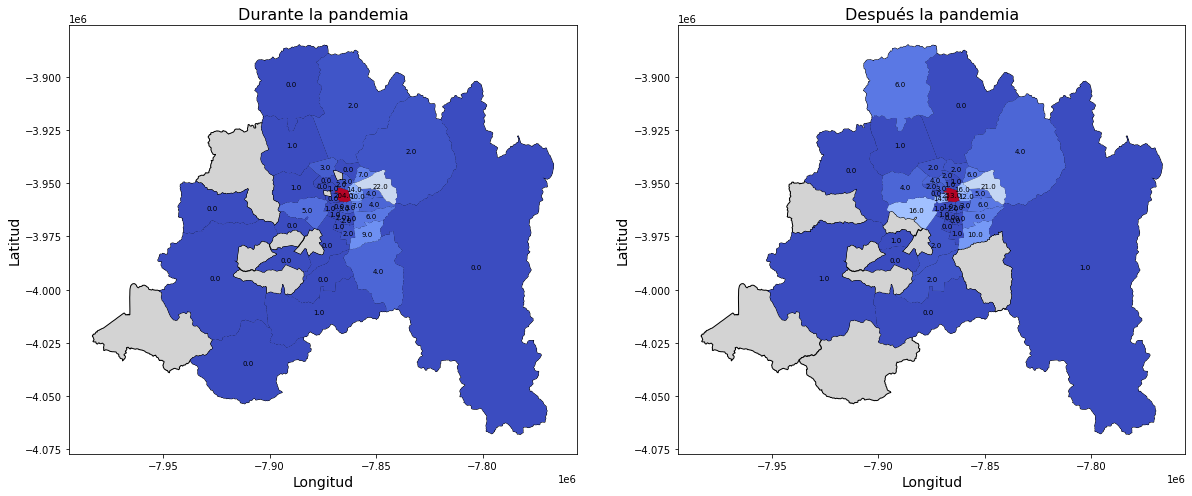

In [733]:

# Crear una figura y ejes con subtramas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 20))


chile_regions[chile_regions['Region'] == 'Región Metropolitana de Santiago'].plot(ax=ax1, color='lightgrey', edgecolor='black')
resultado_pandemia[resultado_pandemia['Region'] == 'Región Metropolitana de Santiago'].plot(ax=ax1, column="NEG", cmap='coolwarm', legend=False, vmin=1, vmax=50)
ax1.set_title('Durante la pandemia', fontsize=16)
ax1.set_xlabel('Longitud', fontsize=14)
ax1.set_ylabel('Latitud', fontsize=14)


chile_regions[chile_regions['Region'] == 'Región Metropolitana de Santiago'].plot(ax=ax2, color='lightgrey', edgecolor='black')
resultado_post_pandemia[resultado_post_pandemia['Region'] == 'Región Metropolitana de Santiago'].plot(ax=ax2, column="NEG", cmap='coolwarm', legend=False, vmin=1, vmax=50)
ax2.set_title('Después la pandemia', fontsize=16)
ax2.set_xlabel('Longitud', fontsize=14)
ax2.set_ylabel('Latitud', fontsize=14)

# Agregar números sobre las comunas en el primer gráfico (durante la pandemia)
for idx, row in resultado_pandemia[resultado_pandemia['Region'] == 'Región Metropolitana de Santiago'].iterrows():
    ax1.annotate(text=row['NEG'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 ha='center', va='center', fontsize=7, color='black')

# Agregar números sobre las comunas en el segundo gráfico (después de la pandemia)
for idx, row in resultado_post_pandemia[resultado_post_pandemia['Region'] == 'Región Metropolitana de Santiago'].iterrows():
    ax2.annotate(text=row['NEG'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 ha='center', va='center', fontsize=7, color='black')


# Mostrar el mapa
fig.show()

In [728]:
chile_regions['Region'].unique()

array(["Región del Libertador Bernardo O'Higgins",
       'Región de La Araucanía', 'Región Metropolitana de Santiago',
       'Región de Los Lagos', 'Región de Los Ríos', 'Región del Maule',
       'Región de Coquimbo', 'Región de Magallanes y Antártica Chilena',
       'Zona sin demarcar', 'Región de Valparaíso', 'Región del Bío-Bío',
       'Región de Aysén del Gral.Ibañez del Campo', 'Región de Tarapacá',
       'Región de Arica y Parinacota', 'Región de Antofagasta',
       'Región de Ñuble', 'Región de Atacama'], dtype=object)

C:\Users\gluar\AppData\Local\Temp\ipykernel_26392\4221722214.py:29: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


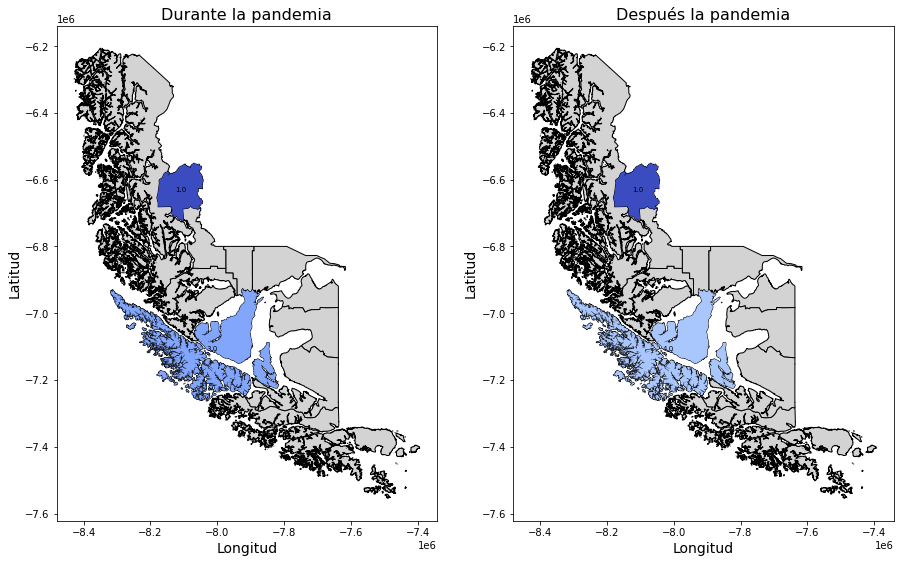

In [729]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 15))


chile_regions[chile_regions['Region'] == 'Región de Magallanes y Antártica Chilena'].plot(ax=ax1, color='lightgrey', edgecolor='black')
resultado_pandemia[resultado_pandemia['Region'] == 'Región de Magallanes y Antártica Chilena'].plot(ax=ax1, column="NEG", cmap='coolwarm', legend=False, vmin=1, vmax=10)
ax1.set_title('Durante la pandemia', fontsize=16)
ax1.set_xlabel('Longitud', fontsize=14)
ax1.set_ylabel('Latitud', fontsize=14)


chile_regions[chile_regions['Region'] == 'Región de Magallanes y Antártica Chilena'].plot(ax=ax2, color='lightgrey', edgecolor='black')
resultado_post_pandemia[resultado_post_pandemia['Region'] == 'Región de Magallanes y Antártica Chilena'].plot(ax=ax2, column="NEG", cmap='coolwarm', legend=False, vmin=1, vmax=10)
ax2.set_title('Después la pandemia', fontsize=16)
ax2.set_xlabel('Longitud', fontsize=14)
ax2.set_ylabel('Latitud', fontsize=14)

# Agregar números sobre las comunas en el primer gráfico (durante la pandemia)
for idx, row in resultado_pandemia[resultado_pandemia['Region'] == 'Región de Magallanes y Antártica Chilena'].iterrows():
    ax1.annotate(text=row['NEG'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 ha='center', va='center', fontsize=7, color='black')

# Agregar números sobre las comunas en el segundo gráfico (después de la pandemia)
for idx, row in resultado_post_pandemia[resultado_post_pandemia['Region'] == 'Región de Magallanes y Antártica Chilena'].iterrows():
    ax2.annotate(text=row['NEG'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 ha='center', va='center', fontsize=7, color='black')


# Mostrar el mapa
fig.show()

C:\Users\gluar\AppData\Local\Temp\ipykernel_26392\397208528.py:29: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


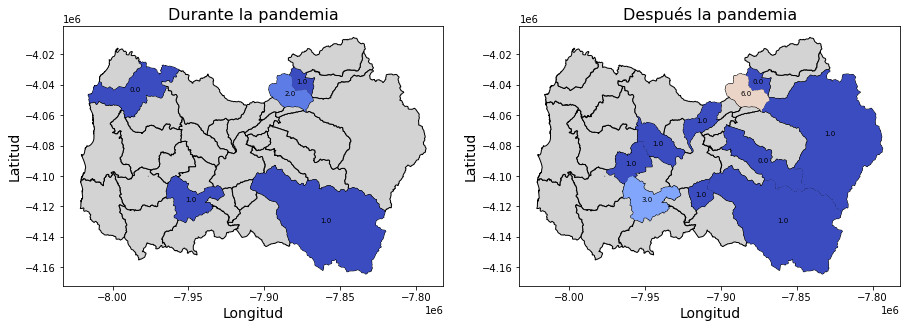

In [730]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 15))


chile_regions[chile_regions['Region'] == "Región del Libertador Bernardo O'Higgins"].plot(ax=ax1, color='lightgrey', edgecolor='black')
resultado_pandemia[resultado_pandemia['Region'] == "Región del Libertador Bernardo O'Higgins"].plot(ax=ax1, column="NEG", cmap='coolwarm', legend=False, vmin=1, vmax=10)
ax1.set_title('Durante la pandemia', fontsize=16)
ax1.set_xlabel('Longitud', fontsize=14)
ax1.set_ylabel('Latitud', fontsize=14)


chile_regions[chile_regions['Region'] == "Región del Libertador Bernardo O'Higgins"].plot(ax=ax2, color='lightgrey', edgecolor='black')
resultado_post_pandemia[resultado_post_pandemia['Region'] == "Región del Libertador Bernardo O'Higgins"].plot(ax=ax2, column="NEG", cmap='coolwarm', legend=False, vmin=1, vmax=10)
ax2.set_title('Después la pandemia', fontsize=16)
ax2.set_xlabel('Longitud', fontsize=14)
ax2.set_ylabel('Latitud', fontsize=14)

# Agregar números sobre las comunas en el primer gráfico (durante la pandemia)
for idx, row in resultado_pandemia[resultado_pandemia['Region'] == "Región del Libertador Bernardo O'Higgins"].iterrows():
    ax1.annotate(text=row['NEG'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 ha='center', va='center', fontsize=7, color='black')

# Agregar números sobre las comunas en el segundo gráfico (después de la pandemia)
for idx, row in resultado_post_pandemia[resultado_post_pandemia['Region'] == "Región del Libertador Bernardo O'Higgins"].iterrows():
    ax2.annotate(text=row['NEG'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 ha='center', va='center', fontsize=7, color='black')


# Mostrar el mapa
fig.show()